#### Name : SINU S MARIAM
#### Designation : Data Science Intern  
#### Organization : Bharat Intern
#### Task 2 - Titanic Classification
#### Problem Statement:
* Develop a predictive model based on 'Titanic Dataset' to identify “ what sorts of people were more likely to survive ? ” using passenger data such as name, age, gender, socio-economic class, etc.

In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
#importing Data
data_file=r'C:\Users\sinus\OneDrive\Documents\bharatintern\Titanic Dataset.csv'
data_frame=pd.read_csv(data_file)

####  Performing descriptive analysis. Understand the variables and their corresponding values. 

In [3]:
# Understanding the Data Variables
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Show the top 5 Rows of data
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Identify columns in Dataset
data_frame.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Data Cleaning

In [6]:
# Checking for null values
data_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 * Variable 'Age' contains 177 null values, So the respective null values can be replaced by the mean values of Age.
 * Variable 'Cabin' can be dropped as it contains 687 null values.

In [7]:
# Null values in "Age" column replaced by the mean values
data_frame['Age'] = data_frame['Age'].fillna(data_frame['Age'].mean().round())

In [8]:
data_frame['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [9]:
data_frame['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

 * Variables 'PassengerId' and 'Ticket' can be dropped as they have numerous unique values.

In [10]:
data_frame.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [11]:
# Show the remaining columns
data_frame.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
#Checking values in 'Survived' Variable
data_frame['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

 * Survived represented by '1', Not Survived by'0'

In [13]:
#Checking values in 'Embarked' Variable
data_frame.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

 * Embarked represents the port where the passengers are embarked from , such as C for Cherbourg, Q for Queenstown, S for Southampton.

In [14]:
#Checking values in 'Sex' Variable
data_frame['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
#Checking values in 'Pclass' Variable
data_frame['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
#Checking values in 'SibSp' Variable
#SibSp represents number of siblings or spouses traveling with passenger
data_frame['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [17]:
#Checking values in 'Parch' Variable
#Parch represents number of parents or children traveling with passenger
data_frame['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### Data Visualization

In [18]:
# find correlation between variables in data set for plotting heatmap
df_corr=data_frame.corr()

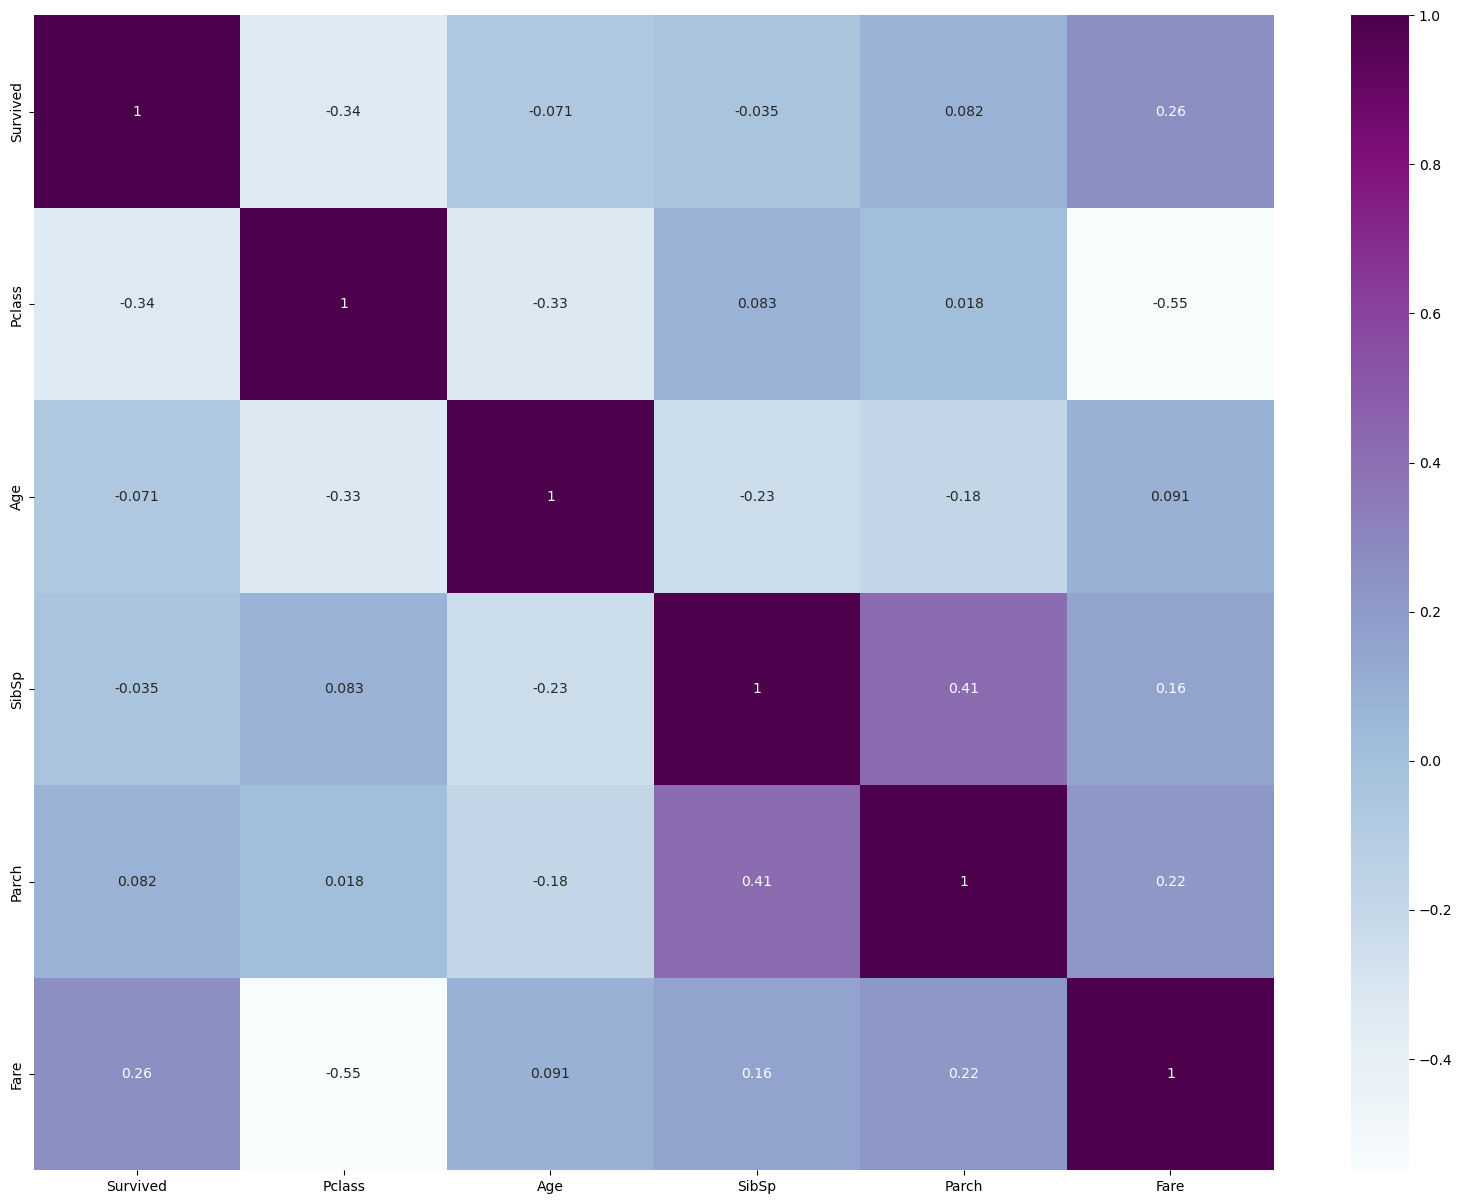

In [19]:
# Plotting Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True,cmap="BuPu")
plt.show()

 * Variables Fare, Parch have positive correlation values with the target variable 'Survived'.

<Axes: >

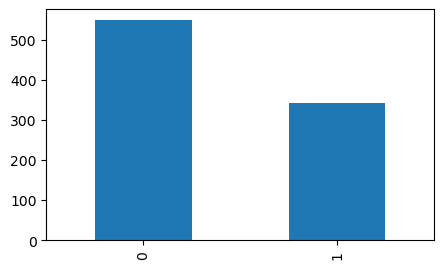

In [20]:
# Plotting Histogram of 'Survived' variable
data_frame['Survived'].value_counts().plot(kind='bar',figsize=(5,3))

<Axes: xlabel='Embarked', ylabel='count'>

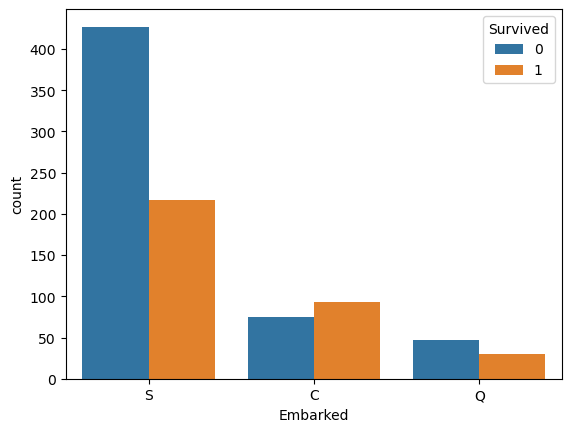

In [21]:
# Plotting countplot of  no: of Survivors for 'Embarked' variable
sns.countplot(data_frame,x="Embarked",hue="Survived" )

<Axes: xlabel='Sex', ylabel='count'>

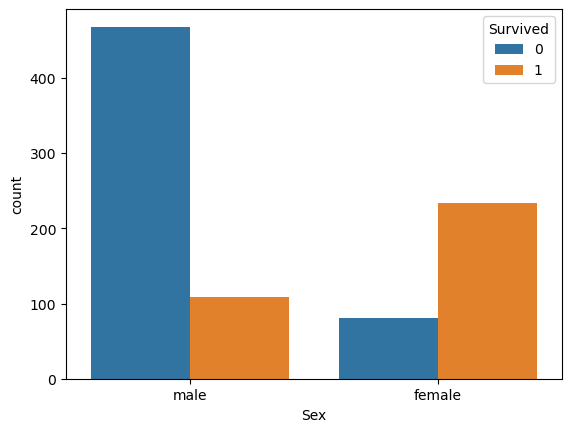

In [22]:
# Plotting countplot of no: of Survivors for 'Sex' variable
sns.countplot(data_frame,x="Sex",hue="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

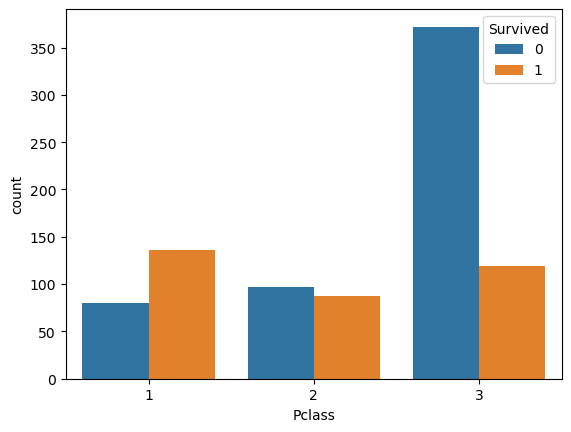

In [23]:
# Plotting countplot of no: of Survivors for 'Pclass' variable
sns.countplot(data_frame,x='Pclass',hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

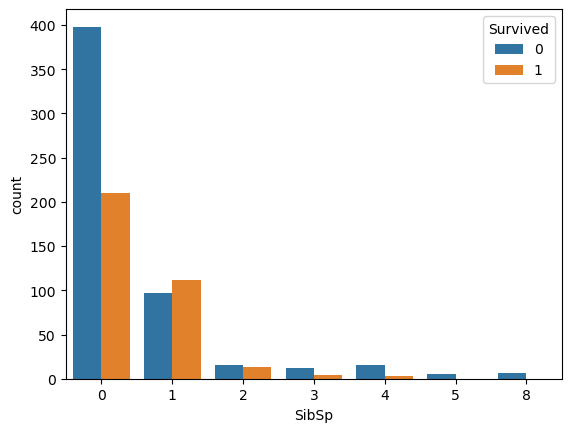

In [24]:
# Plotting countplot of no: of Survivors for 'Sibsp' variable
sns.countplot(data_frame,x='SibSp',hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

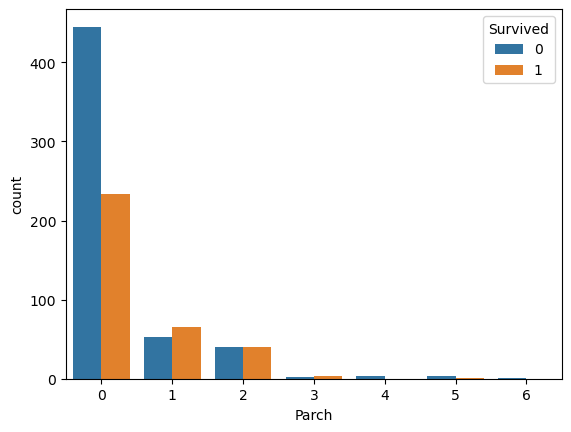

In [25]:
# Plotting countplot of no: of Survivors for 'Parch' variable
sns.countplot(data_frame,x='Parch',hue='Survived')

#### Convert Categorical values to Numerical values

In [26]:
# Labelling categorical values in 'Sex' variable
data_frame['Sex'] = np.where(data_frame['Sex'] == 'male',1,0)

In [27]:
# For labelling the categorical  column-'Emabarked',Label encoding is permormed 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame["Embarked"] = le.fit_transform(data_frame['Embarked'])
data_frame['Embarked'].unique()

array([2, 0, 1, 3])

#### Building the Model

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#First step in building the model is to identify the Feature(Input) variables and Target (Output) variable
#Target represents the 'Survived' column and all remaining columns are features
features = data_frame.drop(['Survived'], axis=1)
target = data_frame['Survived']

In [30]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [31]:
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (712, 7)
Test set of features:  (179, 7)
Target for train:  (712,)
Target for test:  (179,)


### Scaling the data

In [32]:
# Scaling data using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
minmax_scaler_model=MinMaxScaler()
X_train_scaled_frame=minmax_scaler_model.fit_transform(X_train)
X_test_scaled_frame=minmax_scaler_model.transform(X_test)


### 1. Decision Tree model

#### Learn the Decision Tree model on train data

In [33]:
from sklearn.tree import DecisionTreeClassifier
my_model_DT = DecisionTreeClassifier(max_depth = 5, random_state = 0)

In [34]:
# Fitting the model in train data set ie the Decision Tree Model should learn from the Train Data
my_model_DT=my_model_DT.fit(X_train_scaled_frame, y_train)

#### Prediction

In [35]:
# Predicting the Species from Feature Test values
y_pred_DT = my_model_DT.predict(X_test_scaled_frame)
y_pred_DT

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

#### Testing the Decision Tree Classifier model

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred_DT)

0.7877094972067039

In [38]:
# find Precision Score= TP/(TP+FP)
precision_score(y_test, y_pred_DT)

0.7714285714285715

In [39]:
# Recall = TP/(TP+FN)
# Recall gives the percentage of positives well predicted by our model.
recall_score(y_test, y_pred_DT)

0.7105263157894737

In [40]:
# f1_score= (Precition * Recall )/ (Precition + Recall)
f1_score(y_test, y_pred_DT)

0.7397260273972601

### 2. KNN Classifier

#### Learn the KNN Classifier model  on train data

In [41]:
from sklearn.neighbors import KNeighborsClassifier
my_model_KNN = KNeighborsClassifier()

In [42]:
# Fitting the model in train data set ie the KNN Classifier Model should learn from the  Train Data
my_model_KNN=my_model_KNN.fit(X_train_scaled_frame, y_train)

#### Prediction

In [43]:
# Predicting from Feature Test values
y_pred_KNN = my_model_KNN.predict(X_test_scaled_frame)

#### Testing the KNN Classifier model

In [44]:
accuracy_score(y_test, y_pred_KNN)

0.8212290502793296

In [45]:
precision_score(y_test, y_pred_KNN)

0.8333333333333334

In [46]:
recall_score(y_test, y_pred_KNN)

0.7236842105263158

In [47]:
f1_score(y_test, y_pred_KNN)

0.7746478873239436

### 3. Random Forest Classifier Model

In [48]:
from sklearn.ensemble import RandomForestClassifier  
my_model_RF= RandomForestClassifier()

In [49]:
# Fitting the model in train data set ie the  Random Forest Classifier Model should learn from the  Train Data
my_model_RF=my_model_RF.fit(X_train_scaled_frame, y_train)

#### Prediction

In [50]:
# Predicting  from Feature Test values
y_pred_RF = my_model_RF.predict(X_test_scaled_frame)

#### Testing the Random Forest Classifier Model

In [51]:
accuracy_score(y_test, y_pred_RF)

0.7988826815642458

In [52]:
precision_score(y_test, y_pred_RF)

0.7857142857142857

In [53]:
recall_score(y_test, y_pred_RF)

0.7236842105263158

In [54]:
f1_score(y_test, y_pred_RF)

0.7534246575342466

### 4. Logistic Regression Model

### Learn the Logistic Regression Model on train data

In [55]:
from sklearn.linear_model import LogisticRegression
my_model_LR=model = LogisticRegression()

In [56]:
# Fitting the model in train data set ie the  Logistic Regression Model should learn from the  Train Data
my_model_LR=my_model_LR.fit(X_train_scaled_frame, y_train)

In [57]:
# Predicting  from Feature Test values
y_pred_LR = my_model_LR.predict(X_test_scaled_frame)

#### Testing the Logistic Regression Model

In [58]:
accuracy_score(y_test, y_pred_LR)

0.7821229050279329

In [59]:
precision_score(y_test, y_pred_LR)

0.7846153846153846

In [60]:
recall_score(y_test, y_pred_LR)

0.6710526315789473

In [61]:
f1_score(y_test, y_pred_LR)

0.7234042553191491

 * From the above analysis, it is noted that KNN Classifier model performs better compared to other models

--------------------THE END----------------------